In [1]:
%reload_ext autoreload
%autoreload 2
import sympy as sp
sp.init_printing()

## Continuous Weighted Threshold Enhanced Configuration model
This models constraints both the degree and strenght sequences by the Lagrange multipliers $\alpha_{ij}$ and $\beta_{ij}$
The Hamiltonian of the problem is hence $H=\sum_{i<j} \alpha_{ij} \Theta(w_{ij}-t) + \beta_{ij} w_{ij}\Theta(w_{ij}-t)$.
We declare all the symbols necessary to continue.

In [2]:
alphaij = sp.Symbol('\\alpha_{ij}',real=True,positive=True)
alphai = sp.Symbol('\\alpha_{i}',real=True,positive=True)
alphaj = sp.Symbol('\\alpha_{j}',real=True,positive=True)
xi = sp.Symbol('x_{i}',real=True,positive=True)
xj = sp.Symbol('x_{j}',real=True,positive=True)

betaij = sp.Symbol('\\beta_{ij}',real=True,positive=True)
betai = sp.Symbol('\\beta_{i}',real=True,positive=True)
betaj = sp.Symbol('\\beta_{j}',real=True,positive=True)

yi = sp.Symbol('y_{i}',real=True,positive=True)
yj = sp.Symbol('y_{j}',real=True,positive=True)

wij = sp.Symbol('w_{ij}',real=True,positive=True)
t = sp.Symbol('t',real=True,positive=True)

H = alphaij * sp.Heaviside(wij-t) + betaij * wij * sp.Heaviside(wij-t)

Now we perform the calculation of the partition function $Z=\int_{0}^{\infty} e^{-H} dw$ with the result $$Z=t + \frac{e^{-\alpha_{ij}-t\beta_{ij}}}{\beta_{ij}}$$

In [3]:
Z = sp.integrate(sp.exp(-H).rewrite(sp.Piecewise),(wij,0,sp.oo))
Z

Calculation of ensemble quantities
----------------------------------
Compute the free energy $F=-\log(Z)$. 
By taking the derivatives $\frac{\partial F}{\partial \alpha_{ij}}$, $\frac{\partial F}{\partial \alpha_{ij}}$ we get the expected link probability $\langle a_{ij} \rangle$ and the expected link weight $\langle w_{ij} \rangle$ respectively:

In [7]:
F = -sp.log(Z)
dFdalphaij = sp.diff(F,alphaij)
dFdbetaij = sp.diff(F,betaij)

However we need to use the variables $x_i,x_j$ and $y_i,y_j$ for the Lagrange multipliers, for notational convention. They are obtained as $x_i = e^{-\alpha_i}$ and $y_i=e^{-\beta_i}$, so we create some replacements dictionaries `repl,repl2,repl3`

In [8]:
repl = {alphaij: -sp.log(xi)-sp.log(xj), betaij: -sp.log(yi)-sp.log(yj) }
repl3 = {alphai: -sp.log(xi), alphaj: -sp.log(xj), betai: -sp.log(yi), betaj: -sp.log(yj)}
repl2 = {alphaij: alphai+alphaj, betaij: betai+betaj }

Now we obtain an expression for $\langle a_{ij} \rangle$

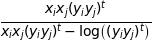

In [9]:
expected_aij = sp.simplify(dFdalphaij.subs(repl))
expected_aij

and proceed similarly for the expected link weights $\langle w_{ij} \rangle$

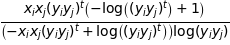

In [10]:
expected_wij = sp.simplify(dFdbetaij.subs(repl))
expected_wij

From this last formula we find that the expected link weight is obtained from the link probability multiplied by a factor $\frac{\log{\left (\left(y_{i} y_{j}\right)^{t} \right )} - 1}{\log{\left (y_{i} y_{j} \right )}}$

In [ ]:
sp.simplify(expected_wij/expected_aij)

Here we also try to export the formulas as lambda expressions to include in Python directly

In [ ]:
from sympy.utilities.lambdify import lambdastr
lambdastr((xi,xj,yi,yj), sp.simplify((sp.diff(pij.subs(repl2),betai)).subs(repl3)))

In [ ]:
expected_aij = sp.simplify(sp.expand_log(pij.subs(repl)))
expected_wij = sp.simplify(sp.expand_log(wij.subs(repl)))

Graph probability
-----------------
The graph probability $P(G)=e^{-H}/Z$ can be obtained as:

In [26]:
P = sp.simplify(sp.simplify(sp.exp(-H)))
P

In [22]:
sp.series(sp.log(xi),x=xi,x0=1,n=2)

In [13]:
Z

Loglikelihood
-------------
We then take the logarithm of the probability to get the loglikelihood

In [ ]:
loglike = sp.expand_log(sp.log(P),force=False)
loglike

Constraining only strength sequence
-----------------------------------

Now let us study a model where only the strength sequence is constrained $s_i = \sum_j w_{ij}\Theta(w_{ij}-t)$. To do this we must repeat all the previous calculations in the settings $\alpha_{ij}=0$, or equivalently with an Hamiltonian $$H=\sum_{i<j} \beta_{ij}w_{ij}\Theta(w_{ij}-t)$$

In [ ]:
H = betaij * wij * sp.Heaviside(wij-t)

and compute the partition function $Z$

In [ ]:
Z = sp.integrate(sp.exp(-H).rewrite(sp.Piecewise),(wij,0,sp.oo))
Z

the free energy $F=-\log(Z)$ reads like

In [ ]:
F = sp.simplify(-sp.log(Z))
F

The expected link probabability is $\langle w_{ij} \rangle$

The graph probability $P(W)=e^{-H}/Z$ and the likelihood reads like

In [ ]:
P=sp.simplify((sp.exp(-H)/Z))
logL = sp.simplify(sp.expand_log(sp.log(P)))
logL